In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def classification_metrics(estimator, X_train, X_test, y_train, y_test):
    print("\nTrain evaluation metrics:")
    y_pred_train = estimator.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    print(classification_report(y_train, y_pred_train))

    print("\nTest evaluation metrics:")
    y_pred_test = estimator.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    print(classification_report(y_test, y_pred_test))

# Model interpretability

By now, we already understand **what** a model is, and how we can build models of the most varied types. Sometimes, however, it is of interest that the models created are **interpretable**, that is, that it is possible to **analyze why the target $\hat{y}$ was produced by the model**.

The need for model interpretability or not often depends on the specific business problem. There may be certain problems in which the goal is to have the model **with the best possible performance**, without the need to interpret **what** the model is doing. If this is the case, we are completely free to use any technique we want, always aiming to increase the model's performance.

In other cases, however, maximum performance is not the only goal: it is necessary that the models produced are also interpretable, for several reasons, to name a few:

- need to extract strategic insights from the learned structures
- regulatory obligation of interpretability
- need to meet specific business rules

Therefore, if interpretability is an important issue, it is important that we guide the construction of our models with this goal in mind. For this, there are essentially two possible approaches:

> **Create naturally interpretable models**: there are models (that we already know), which are easily interpretable, due to the particular structure of the hypothesis. So, if interpretability is important, choosing these hypotheses can be a good alternative

> Nevertheless, a very important point to consider is that **there are some preprocessing procedures** that can obscure this natural interpretability (for example: scalers, PCA, etc)

> Therefore, if interpretability is indeed an issue, it is very important that attention is taken **even in the preprocessing** of the data, even if this may compromise part of the model's performance

> **Apply some model explainability technique**: if the search for interpretability ends up compromising performance too much, it is possible that we will continue with models that are not naturally interpretable, but that can be interpreted by specific techniques that seek interpretability

Before dive into this subject: the issue of interpretability of ML models is of extreme interest to the scientific community, and has increasingly gained space in the corporate world. More generally, this area is known as [Explainable AI](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence), and there is a great effort towards making AI an interpretable area, which leads to very fundamental discussions about these technologies. For those interested, I suggest some readings [from IBM](https://www.ibm.com/watson/explainable-ai) and [from Google](https://cloud.google.com/explainable-ai).

And for those who really want to dive into this subject, I suggest [this book](https://christophm.github.io/interpretable-ml-book/).

## Naturally interpretable models

### Linear Regression

The first model we built in the course was a linear regression model for the price of houses, based on a single variable:

$$ y = f_H(x) =  1562.01 + 118.61\text{GrLiveArea}$$

This means that adding to the variable "GrLiveArea" in one unit causes the price to be increased by USD 118.6 and he minimum price to be paid, regardless of the built area, is USD 1562.01.

But even multiple linear regression models are interpretable. The hypothesis is given by:

$$ y = f_H(\vec{x}) = b_0 + \sum_{i=1}^n b_i X_i = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

The interpretability is also direct:

> Increasing one unit of feature $X_i$, we have that the price increases/decreases by $b_i$ units (depending on the sign of the coefficient)

The fixed price is always $b_0$. Note, therefore, that simply by looking at the parameters of the hypothesis (`.coef_` and `.intercept_`), we have concrete and very clear information about how each feature is used to jointly predict the target. This is the simplest example of interpretability.

**Observation**: we can also look at the "size" of the coefficients to understand which features are "more important": larger coefficients (in absolute value) are associated with "greater weight" in determining the target.

But the scale of the features interferes with this analysis. Features with a larger scale tend to provide smaller coefficients, and vice versa. Therefore, if the goal is to inspect feature importance in linear regression, it is important that the data is previously scaled. [This post](https://towardsdatascience.com/feature-importance-in-linear-models-four-often-neglected-but-crucial-pitfalls-e5c513e45b18) briefly discusses this point.

## Trees

Trees are also naturally interpretable models: we can inspect **the path that each observation travels from the root node to the leaf** to understand exactly what the criterion for the decision was, node by node.

We can inspect this path by looking at a plotted tree, or by using the [decision_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.decision_path) method. Let's see a quick example:

In [3]:
df = pd.read_csv("../data/iris.csv")

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train evaluation metrics:


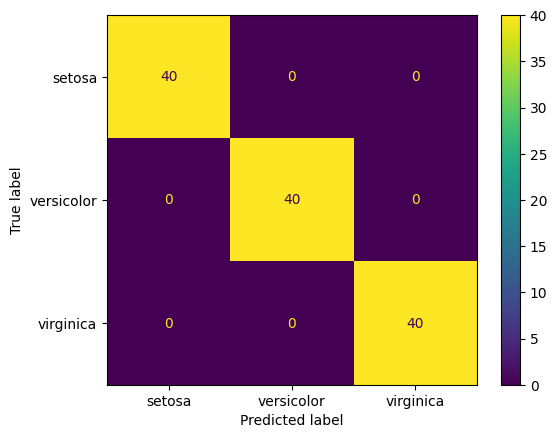

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Test evaluation metrics:


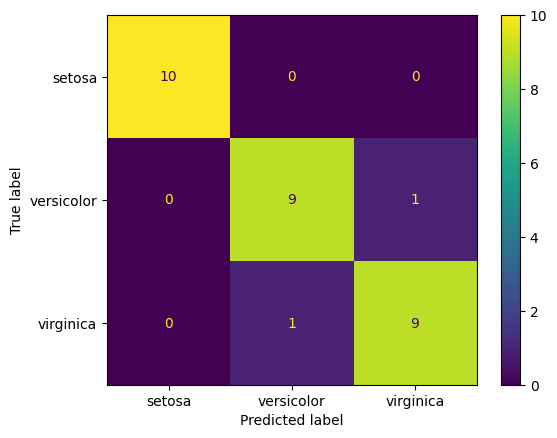

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

classification_metrics(tree, X_train, X_test, y_train, y_test)

In [7]:
tree.get_depth()

5

In [8]:
y_train.unique()

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [9]:
tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [11]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

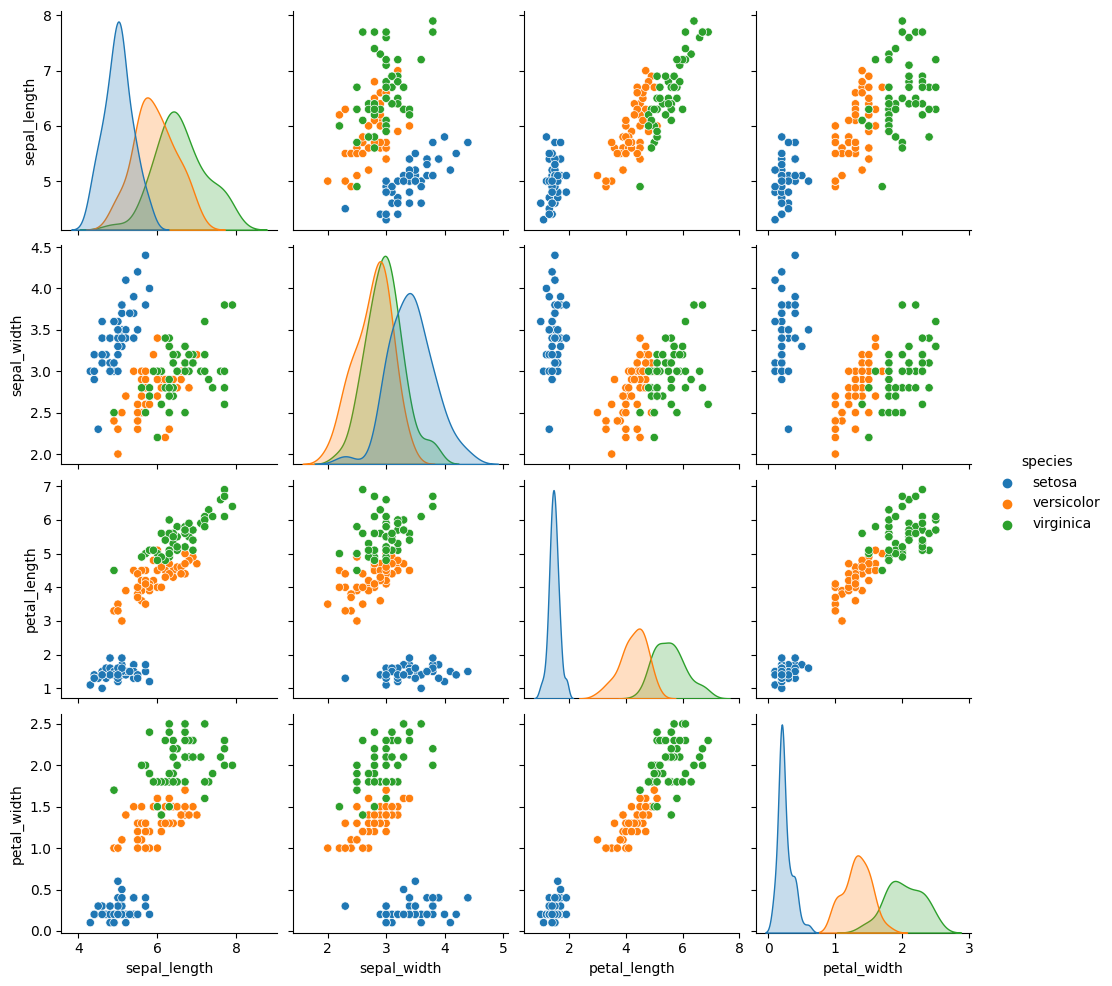

In [13]:
sns.pairplot(df, hue="species");

In [14]:
tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

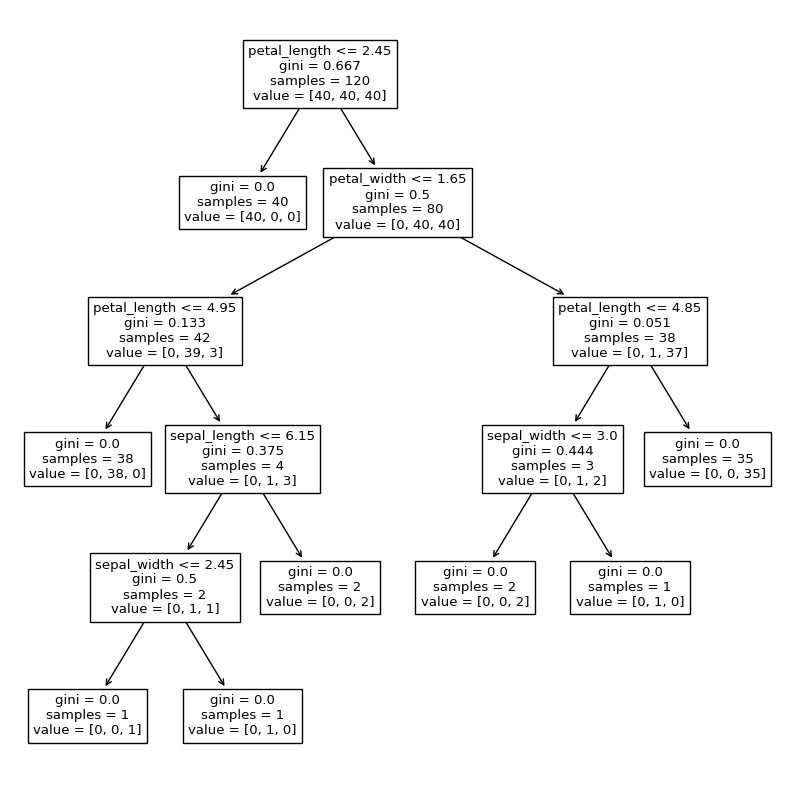

In [15]:
plt.subplots(1, 1, figsize=(10, 10))
plot_tree(tree, feature_names=tree.feature_names_in_)
plt.show();

To learn more, how to take advantage of these structures, [click here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html). Adapting the code from the page above, we can build a function to interpret the tree:

In [20]:
tree.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [ ]:
tree.tree_.feature

In [ ]:
tree.tree_.threshold

In [23]:
def tree_interpreter(tree, X_test, idx):
    
    node_indicator = tree.decision_path(X_test)
    leaf_id = tree.apply(X_test)
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    node_index = node_indicator.indices[node_indicator.indptr[idx] : node_indicator.indptr[idx + 1]]
    
    print(f"{idx+1}st test observation:")
    display(X_test.iloc[[idx]])

    print("="*50)
    print("Rules used in each node:\n")

    feature_names = tree.feature_names_in_
    
    for node_id in node_index:

        # continue to the next node if it is a leaf node
        if leaf_id[idx] == node_id:
            continue

        # check if value of the split feature for sample 0 is below threshold
        if X_test.iloc[idx][feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        
        print("Decision node {node} : ({feature_name} = {value}) "
              "{inequality} {threshold:.2f})".format(node=node_id,
                                                     feature_name=feature_names[feature[node_id]],
                                                     value=X_test.iloc[idx][feature[node_id]],
                                                     inequality=threshold_sign,
                                                     threshold=threshold[node_id]))
        
    y_pred = tree.predict(X_test)[idx]
    print("="*50)
    print(f"Prediction on leaf: y = {y_pred}")

In [26]:
for i in range(0, 3):     # general alternative: for i in range(X_test.shape[0]):
    tree_interpreter(tree, X_test, i)
    
    print()
    print("#"*80)
    print()

1st test observation:


,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2


Rules used in each node:

Decision node 0 : (petal_length = 1.3) <= 2.45)
Prediction on leaf: y = setosa

################################################################################

2st test observation:


,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8


Rules used in each node:

Decision node 0 : (petal_length = 4.9) > 2.45)
Decision node 2 : (petal_width = 1.8) > 1.65)
Decision node 10 : (petal_length = 4.9) > 4.85)
Prediction on leaf: y = virginica

################################################################################

3st test observation:


,sepal_length,sepal_width,petal_length,petal_width
57,4.9,2.4,3.3,1.0


Rules used in each node:

Decision node 0 : (petal_length = 3.3) > 2.45)
Decision node 2 : (petal_width = 1.0) <= 1.65)
Decision node 3 : (petal_length = 3.3) <= 4.95)
Prediction on leaf: y = versicolor

################################################################################



## KNN

KNN models are also interpretable, to some extent, because we can **look at the neighbors that were taken into account to make the decision**, and with that, we can compare these neighbors with the test observation, and thus interpret the decision.

Let's do this with the [kneighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors) method. Let's see an example:


Train evaluation metrics:


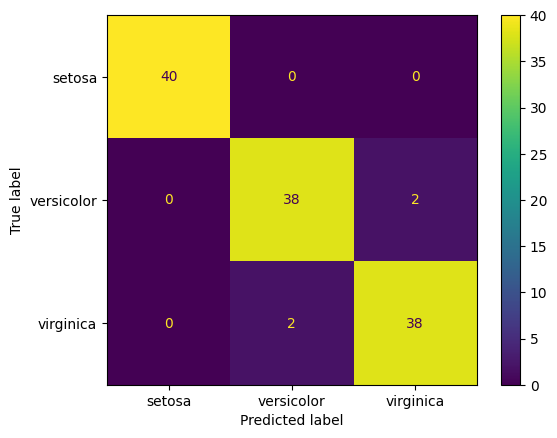

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.95      0.95        40
   virginica       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Test evaluation metrics:


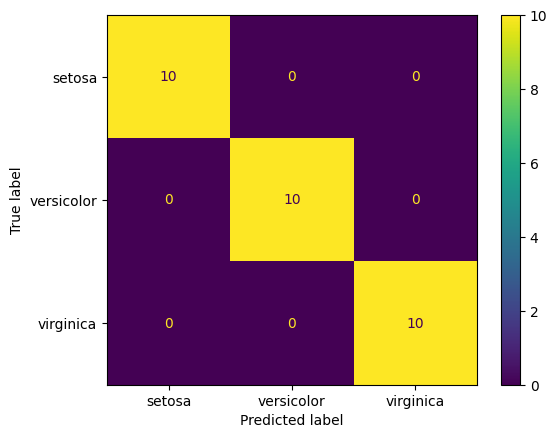

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

classification_metrics(knn, X_train, X_test, y_train, y_test)

Let's look at the neighbors that were used in the first observation of the classification:

In [28]:
dist_k, idcs_k = knn.kneighbors(X_test)

In [29]:
X_test.iloc[[0]]

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2


In [30]:
dist_k[0]

array([0.14142136, 0.24494897, 0.3       , 0.3       , 0.36055513])

In [31]:
idcs_k[0]

array([  0,  93, 119,  58, 116])

We can use the indices to inspect which observations were used in the classification:

In [32]:
knn.n_neighbors

5

In [33]:
X_train.iloc[idcs_k[0]]

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
13,4.3,3.0,1.1,0.1
3,4.6,3.1,1.5,0.2
47,4.6,3.2,1.4,0.2
2,4.7,3.2,1.3,0.2


In [34]:
X_train.iloc[idcs_k[0]].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,5.000000,5.000000,5.000000,5.000000
mean,4.520000,3.080000,1.340000,0.180000
std,0.164317,0.130384,0.151658,0.044721
min,4.300000,2.900000,1.100000,0.100000
25%,4.400000,3.000000,1.300000,0.200000
50%,4.600000,3.100000,1.400000,0.200000
75%,4.600000,3.200000,1.400000,0.200000
max,4.700000,3.200000,1.500000,0.200000


In [35]:
y_train.iloc[idcs_k[0]]

8     setosa
13    setosa
3     setosa
47    setosa
2     setosa
Name: species, dtype: object

Sanity check:

In [36]:
knn.predict(X_test)[0]

'setosa'

In [37]:
knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
knn.predict_proba(X_test)[0]

array([1., 0., 0.])

## LIME

What do we do in the case where it is not practical to use some of the simplest and most interpretable models above?

In these cases, what we will want to do is **train a simple model $g$** that is able to **explain a complex model $f$**. We will then say that $g$ is the **explanatory model** of $f$.

The LIME (**L**ocal **I**nterpretable **M**odel-agnostic **E**xplanations) is a technique that allows us to generate explanatory models $g$ that are trained **locally** with the objective of explaining a complex model $f$.

Consider the classifier on the left, which is the original model ($f$). Note the non-linear decision boundary, which is an indication of difficulty in explainability. If we want to explain this model globally, we will have difficulties, right? (In fact, non-linear decision boundaries are hardly explainable).

On the other hand, **locally**, in regions close to the decision boundary, it is possible to **approximate $f$ by the simple model $g$, which is linear**.

With this, **locally**, it is easy to explain the decision, with the model represented on the right.

<img src=https://deepandshallowml.files.wordpress.com/2019/11/lime_intuition_final.png width=600>

The linear models trained by LIME are also known as surrogate models, and their training works as follows:

- a new dataset of artificial observations is created (permuted data), based on the distribution of the features in the vicinity of the observation to be explained

- the distance between these observations and the real observations are calculated

- the model is used to predict the `predict_proba` for these new observations

- it is chosen the `m` most important features, according to the permuted data

- a linear model is trained with the `m` features, weighing the similarity between samples and the observation to be explained

The original LIME article is available [here](https://arxiv.org/pdf/1602.04938.pdf) -- and it is (perhaps surprisingly) simple to read.

And [in this post](https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5) there are more details about LIME and how it works.

## SHAP

Now, let's take a look at SHAP (**SH**apley **A**dditive ex**P**lanation), another widely used method for interpretability.

The SHAP is a method based on a concept of [game theory](https://en.wikipedia.org/wiki/Game_theory) known as [Shapley values](https://christophm.github.io/interpretable-ml-book/shapley.html).

The general idea of the method is to find **the importance of the features for the prediction** in a very explicit way: to find the importance of a feature $x_i$, we have to:

- train the model $f$ with all **possible subsets** of features, **including $x_i$**
- train the model $f$ with the same subsets, but **excluding $x_i$**
- measure the difference between the outputs of each pair of models

With the difference between the outputs, we can measure **the impact** of removing that feature on the output. Taking a kind of **average** of this impact among all subsets, we can have the overall importance of $x_i$!

Obs.: o operacional do método é similar ao RFE, com a diferença de que aqui consideramos **todos** os subconjuntos com e sem a feature $x_i$!
Observation: the operational of the method is similar to RFE, with the difference that here we consider **all** subsets with and without the feature $x_i$.

Example of subsets:

Consider that we have the features $\vec{x} = (x_1, x_2, x_3, x_4)$, and that we want to estimate the impact of the feature $x_1$.

The possible subsets **that include** $x_1$ are:

$ \{x_1\}$

$ \{x_1, x_2\}$

$ \{x_1, x_3\}$

$ \{x_1, x_4\}$

$ \{x_1, x_2, x_3\}$

$ \{x_1, x_2, x_4\}$

$ \{x_1, x_3, x_4\}$

$ \{x_1, x_2, x_3, x_4\}$

The possible subsets **that do not include** $x_1$ are:

$ \{ \}$

$ \{x_2\}$

$ \{x_3\}$

$ \{x_4\}$

$ \{x_2, x_3\}$

$ \{x_2, x_4\}$

$ \{x_3, x_4\}$

$ \{x_2, x_3, x_4\}$

Note, therefore, that we train **16 different models** to evaluate the importance of $x_1$.

> In general, for $n$ features, we have $2 \times 2^{n-1} = 2^n$ different models that must be trained to inspect the importance of each feature, that is, $n \times 2^n$ models in total.

Therefore, it is clear that the use of Shapley values for the interpretation of models is something **extremely computationally costly**.

It is thinking about this that the SHAP method comes to our salvation. The original SHAP article is [here](https://arxiv.org/pdf/1705.07874.pdf) -- this one is a little harder, but it is also relatively accessible. And [in this post](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30) there are interesting details about how SHAP works.

**Mathematical interlude (conceptual)**: as we said, SHAP is a method based on concepts of game theory. In this theory, there are two very important agents: **the game** and **the players**. In the context of ML interpretability, we have:
- the outputs of the model as the game
- the players as the features to be included in the model
The interaction between these agents is precisely quantified by the Shapley value. See the links above for details.